#### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
from pandas import plotting
# for interactive visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff


C:\Users\LoNe WoLf\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# get titanic & test csv files as a DataFrame
titanic_df = pd.read_csv("train.csv")
test_df    = pd.read_csv("test.csv")

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# drop unnecessary columns, these columns won't be useful in analysis and prediction
titanic_df = titanic_df.drop(['PassengerId','Name','Ticket'], axis=1)
test_df    = test_df.drop(['Name','Ticket'], axis=1)

In [6]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [7]:
titanic_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [8]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age             86
SibSp            0
Parch            0
Fare             1
Cabin          327
Embarked         0
dtype: int64

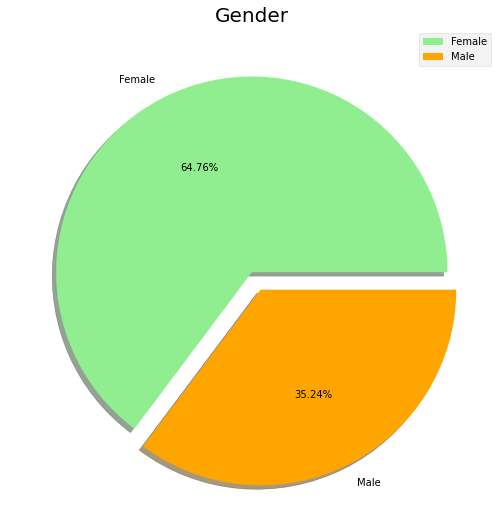

In [9]:
labels = ['Female', 'Male']
size = titanic_df['Sex'].value_counts()
colors = ['lightgreen', 'orange']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [10]:
# missing values int variable
# AGE
titanic_df["Age"].fillna(titanic_df["Age"].median(), inplace=True)
test_df["Age"].fillna(test_df["Age"].median(), inplace=True)

# only for test_df, since there is a missing "Fare" values
test_df["Fare"].fillna(test_df["Fare"].median(), inplace=True)

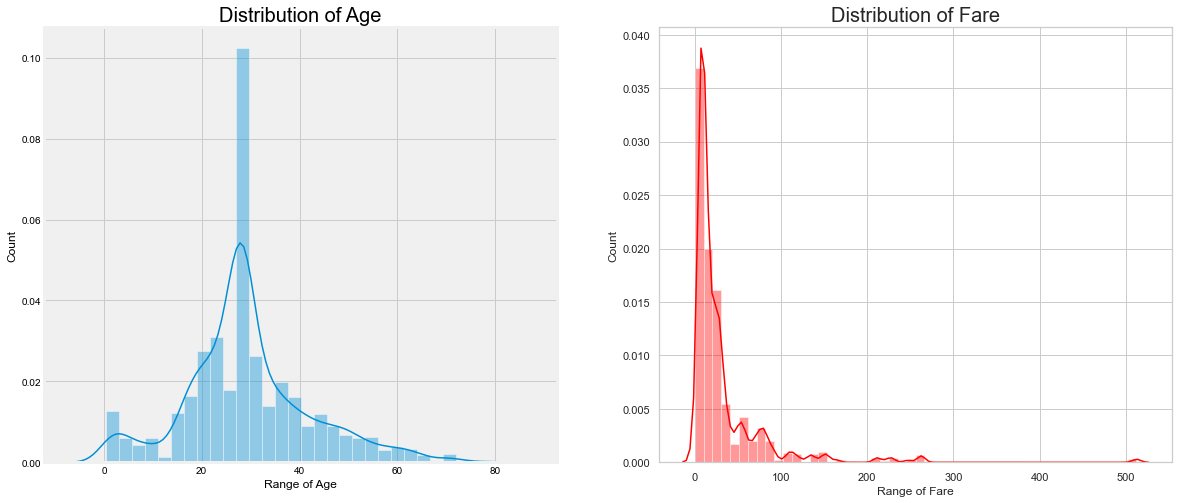

In [11]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (18, 8)

plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(titanic_df['Age'])
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(titanic_df['Fare'], color = 'red')
plt.title('Distribution of Fare', fontsize = 20)
plt.xlabel('Range of Fare')
plt.ylabel('Count')
plt.show()

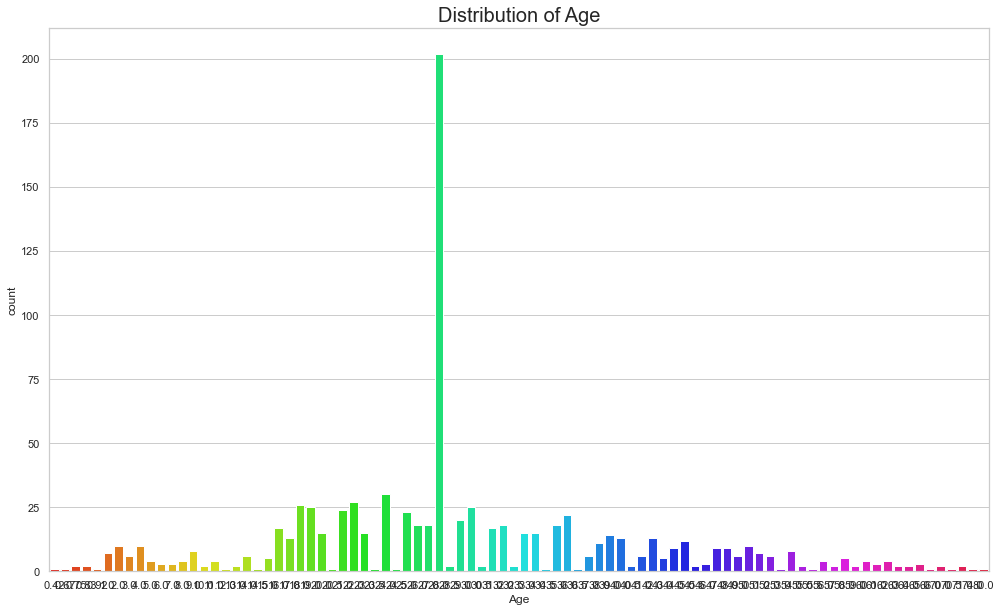

In [12]:
plt.rcParams['figure.figsize'] = (15, 10)
sns.countplot(titanic_df['Age'], palette = 'hsv')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

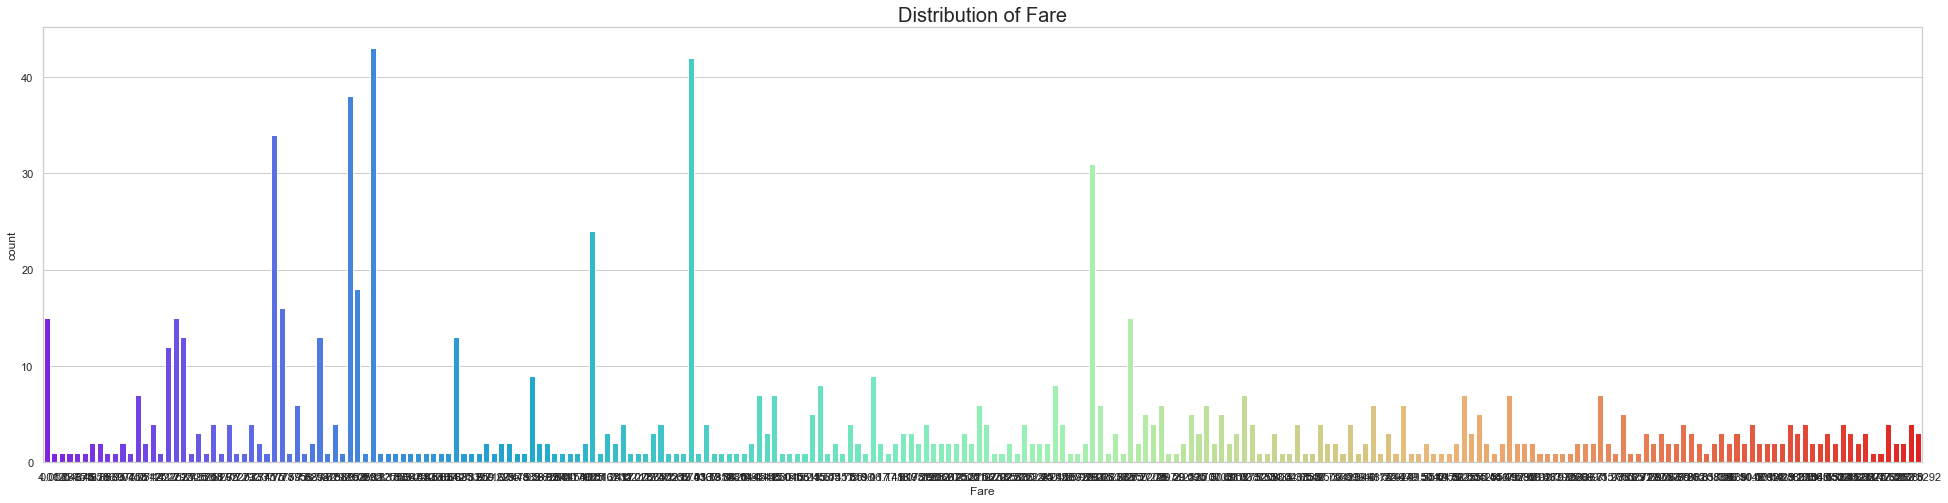

In [13]:
plt.rcParams['figure.figsize'] = (30, 8)
sns.countplot(titanic_df['Fare'], palette = 'rainbow')
plt.title('Distribution of Fare', fontsize = 20)
plt.show()

In [14]:
da=titanic_df[['Survived','Age']]
da=titanic_df.groupby('Survived')['Age'].sum()

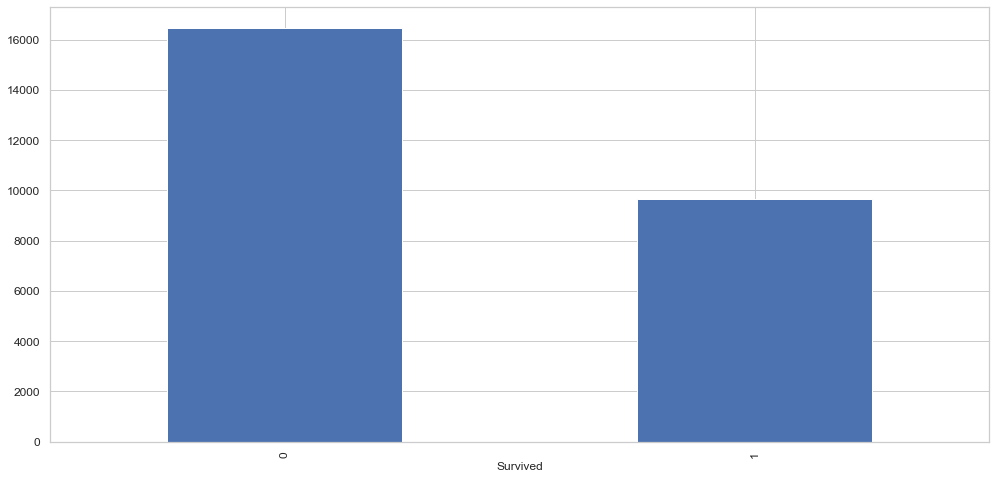

In [15]:
da.plot(kind='bar',figsize=(15,8),fontsize=12)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000027540397F88>,
      dtype=object)

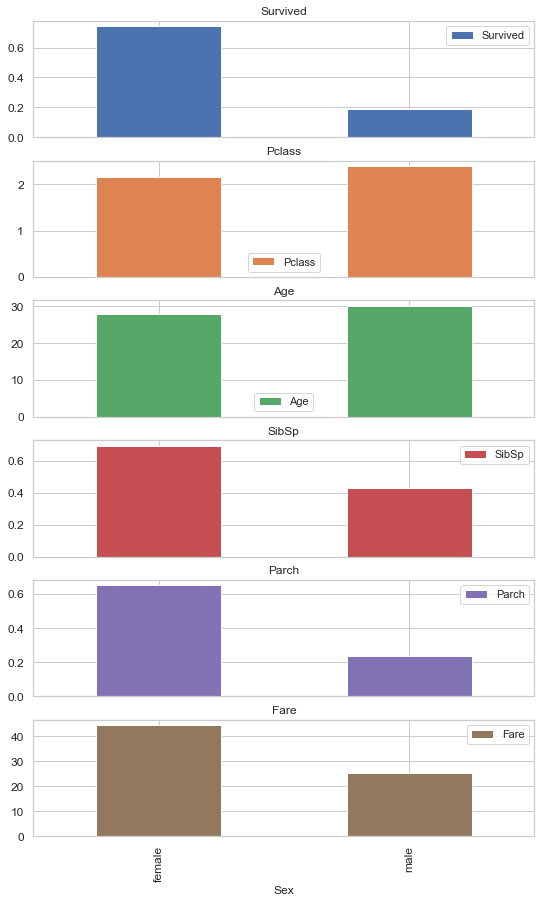

In [16]:
new_df=titanic_df.groupby('Sex').mean()
new_df.plot(kind='bar',subplots=True,figsize=(8,15),fontsize=12)

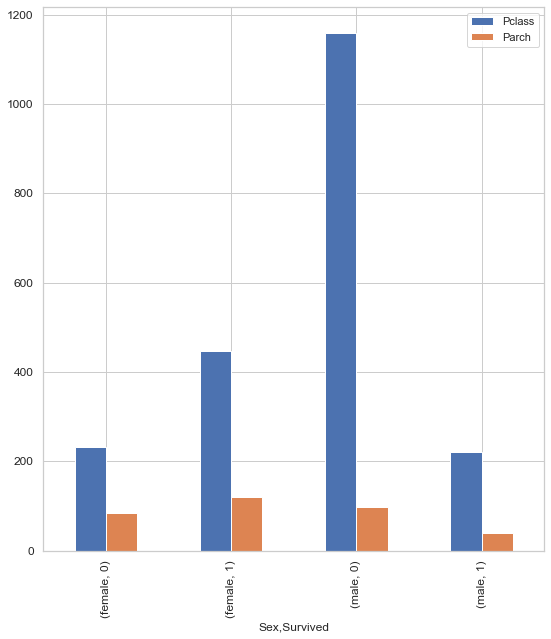

In [17]:
new_dfff=titanic_df.groupby(['Sex','Survived'])[['Pclass','Parch']].sum()
new_dfff.plot(kind='bar',figsize=(8,10),fontsize=12)

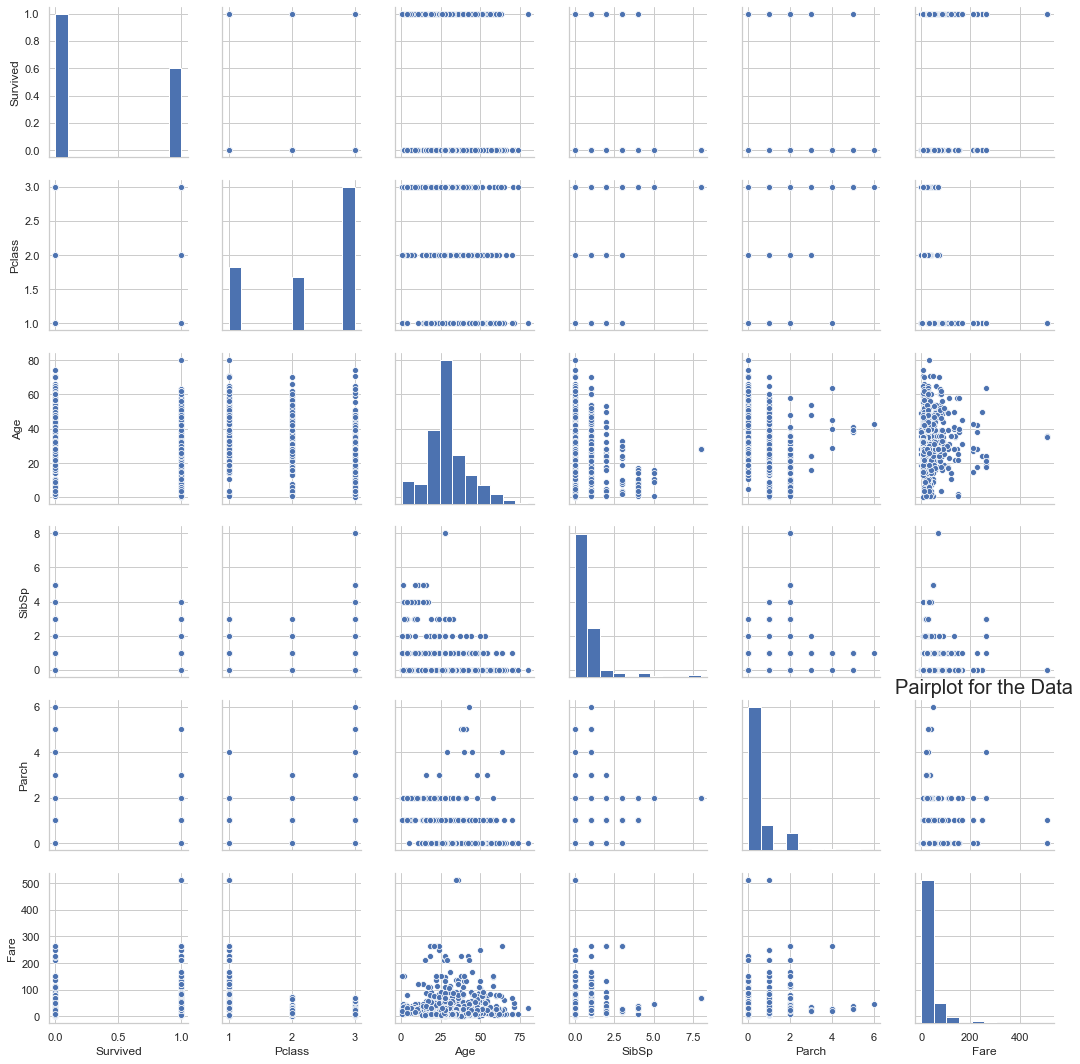

In [18]:
sns.pairplot(titanic_df)
plt.title('Pairplot for the Data', fontsize = 20)
plt.show()

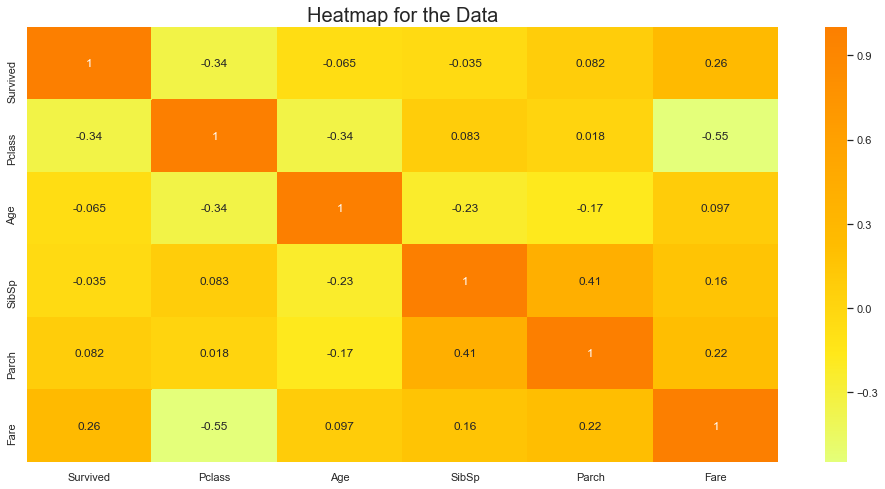

In [19]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(titanic_df.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

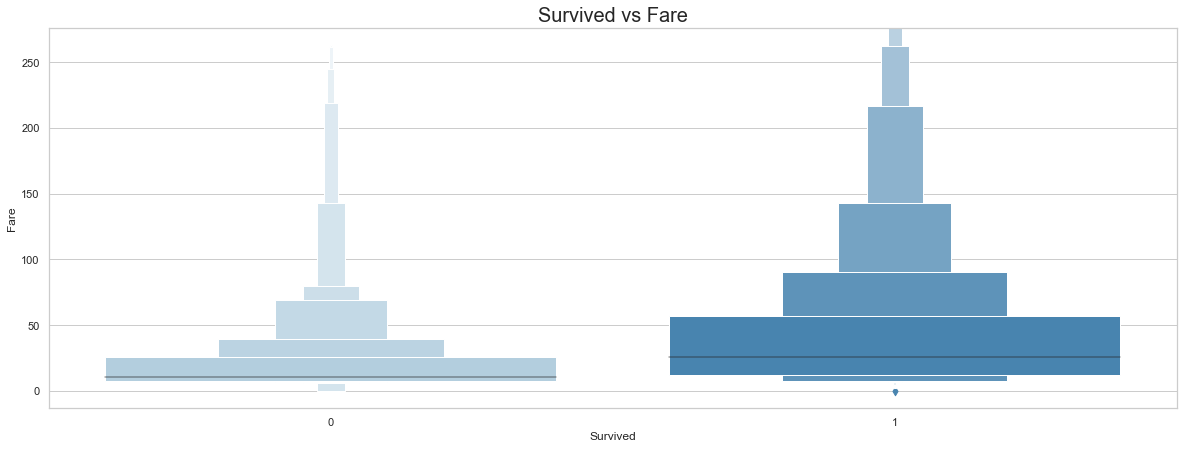

In [20]:
#  Gender vs Spendscore

plt.rcParams['figure.figsize'] = (18, 7)
sns.boxenplot(titanic_df['Survived'], titanic_df['Fare'], palette = 'Blues')
plt.title('Survived vs Fare', fontsize = 20)
plt.show()

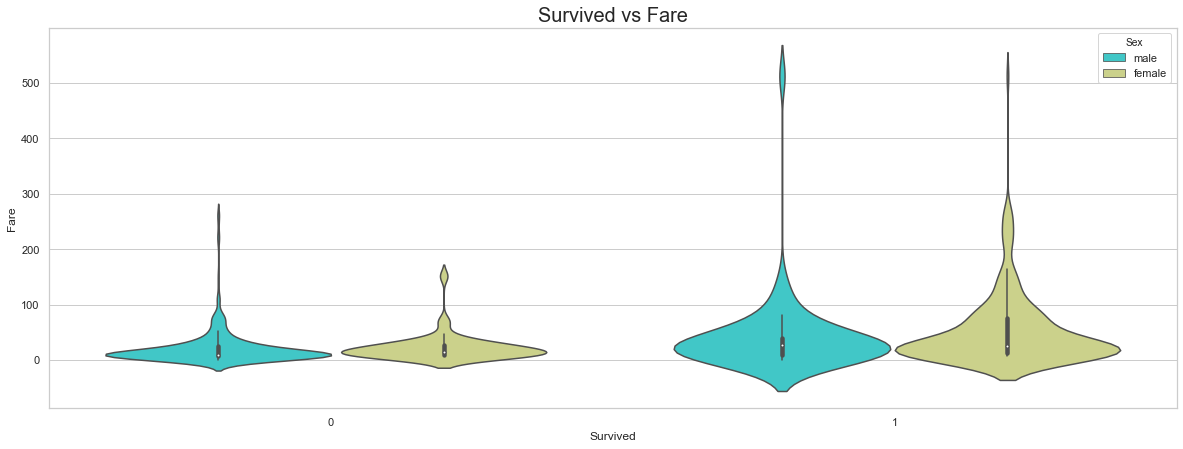

In [21]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.violinplot(titanic_df['Survived'], titanic_df['Fare'],titanic_df['Sex'], palette = 'rainbow')
plt.title('Survived vs Fare', fontsize = 20)
plt.show()

In [22]:
# embarked
titanic_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [23]:
# Embarked

# only in titanic_df, fill the two missing values with the most occurred value, which is "S".
titanic_df["Embarked"] = titanic_df["Embarked"].fillna("S")

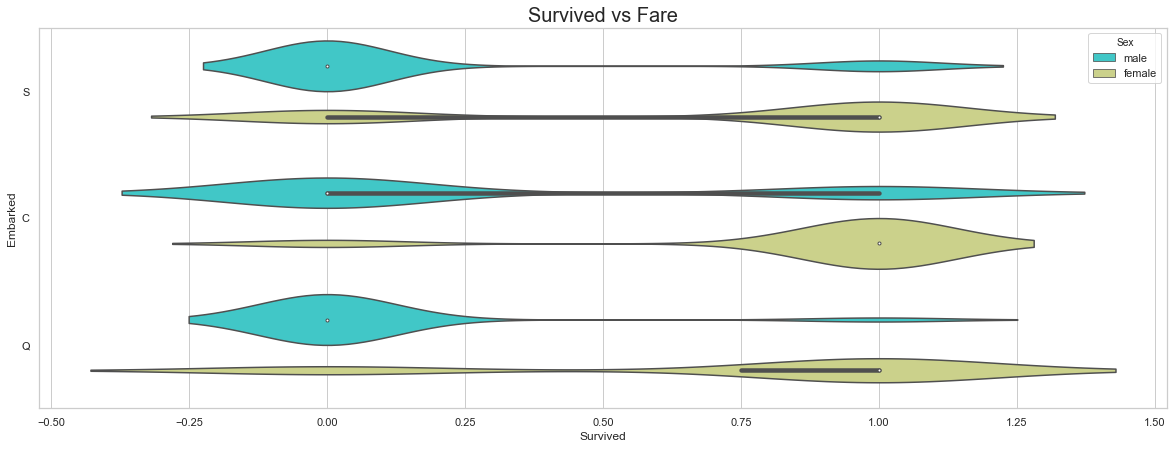

In [24]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.violinplot(titanic_df['Survived'], titanic_df['Embarked'],titanic_df['Sex'], palette = 'rainbow')
plt.title('Survived vs Fare', fontsize = 20)
plt.show()

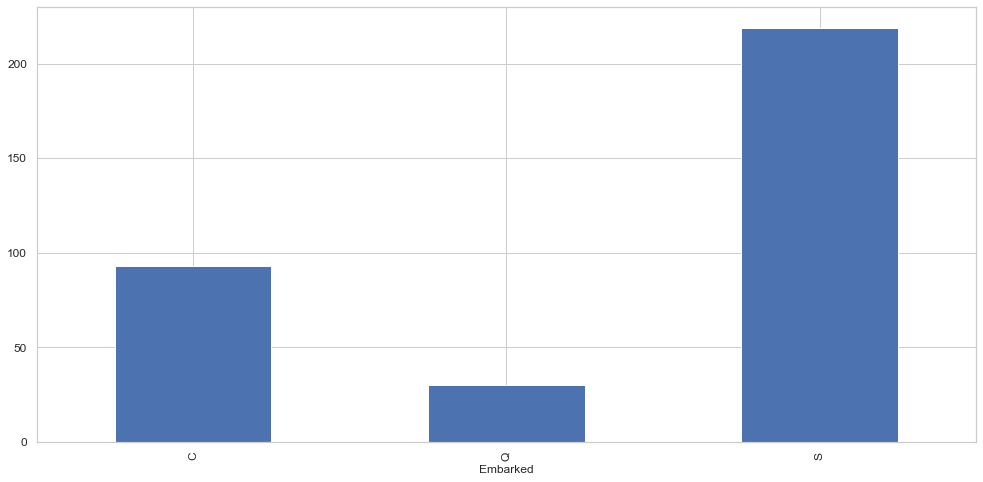

In [25]:
da=titanic_df[['Embarked','Survived']]
da=titanic_df.groupby('Embarked')['Survived'].sum()
da.plot(kind='bar',figsize=(15,8),fontsize=12)


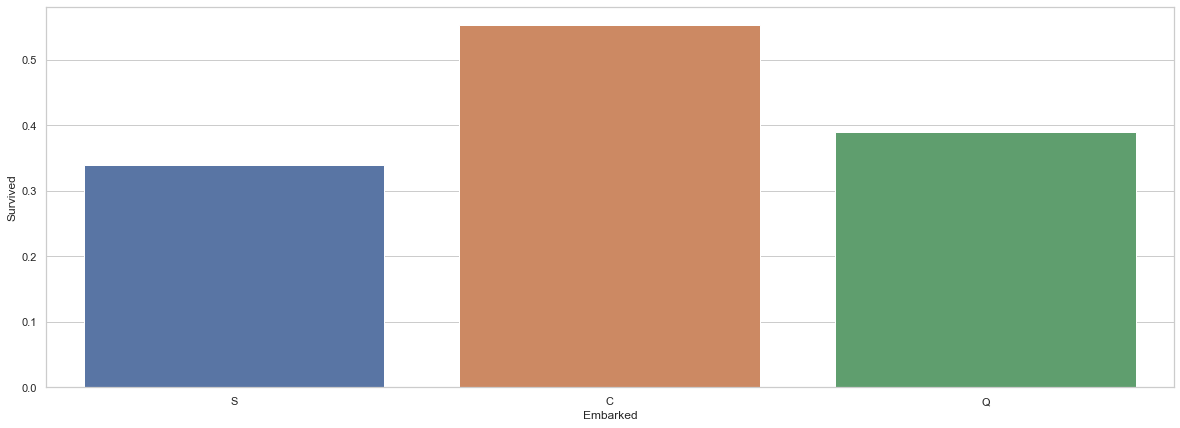

In [28]:
# group by embarked, and get the mean for survived passengers for each value in Embarked
embark_perc = titanic_df[["Embarked", "Survived"]].groupby(['Embarked'],as_index=False).mean()
sns.barplot(x='Embarked', y='Survived', data=embark_perc,order=['S','C','Q'])

In [29]:
# Either to consider Embarked column in predictions,
# and remove "S" dummy variable, 
# and leave "C" & "Q", since they seem to have a good rate for Survival.

# OR, don't create dummy variables for Embarked column, just drop it, 
# because logically, Embarked doesn't seem to be useful in prediction.

embark_dummies_titanic  = pd.get_dummies(titanic_df['Embarked'])
embark_dummies_titanic.drop(['S'], axis=1, inplace=True)

embark_dummies_test  = pd.get_dummies(test_df['Embarked'])
embark_dummies_test.drop(['S'], axis=1, inplace=True)

titanic_df = titanic_df.join(embark_dummies_titanic)
test_df    = test_df.join(embark_dummies_test)

titanic_df.drop(['Embarked'], axis=1,inplace=True)
test_df.drop(['Embarked'], axis=1,inplace=True)

In [31]:
# Fare

# only for test_df, since there is a missing "Fare" values
test_df["Fare"].fillna(test_df["Fare"].median(), inplace=True)

# convert from float to int
titanic_df['Fare'] = titanic_df['Fare'].astype(int)
test_df['Fare']    = test_df['Fare'].astype(int)





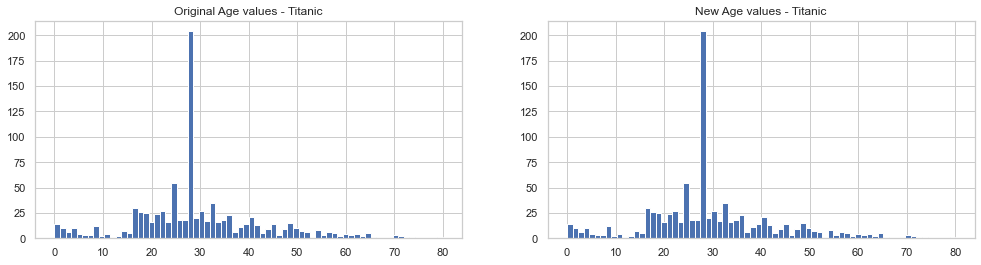

In [34]:
# Age

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
axis1.set_title('Original Age values - Titanic')
axis2.set_title('New Age values - Titanic')
# get average, std, and number of NaN values in titanic_df
average_age_titanic   = titanic_df["Age"].mean()
std_age_titanic       = titanic_df["Age"].std()
count_nan_age_titanic = titanic_df["Age"].isnull().sum()

# get average, std, and number of NaN values in test_df
average_age_test   = test_df["Age"].mean()
std_age_test       = test_df["Age"].std()
count_nan_age_test = test_df["Age"].isnull().sum()

# generate random numbers between (mean - std) & (mean + std)
rand_1 = np.random.randint(average_age_titanic - std_age_titanic, average_age_titanic + std_age_titanic, size = count_nan_age_titanic)
rand_2 = np.random.randint(average_age_test - std_age_test, average_age_test + std_age_test, size = count_nan_age_test)

# plot original Age values
# NOTE: drop all null values, and convert to int
titanic_df['Age'].dropna().astype(int).hist(bins=70, ax=axis1)
# test_df['Age'].dropna().astype(int).hist(bins=70, ax=axis1)

# fill NaN values in Age column with random values generated
titanic_df["Age"][np.isnan(titanic_df["Age"])] = rand_1
test_df["Age"][np.isnan(test_df["Age"])] = rand_2

# convert from float to int
titanic_df['Age'] = titanic_df['Age'].astype(int)
test_df['Age']    = test_df['Age'].astype(int)
        
# plot new Age Values
titanic_df['Age'].hist(bins=70, ax=axis2)
# test_df['Age'].hist(bins=70, ax=axis4)

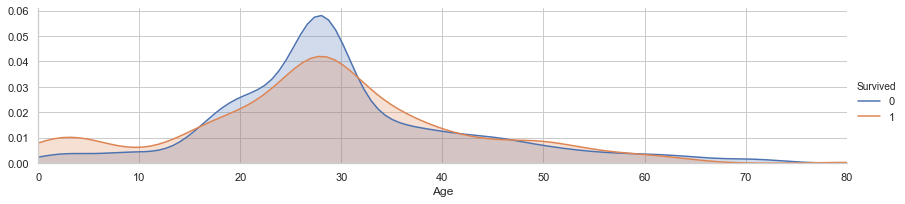

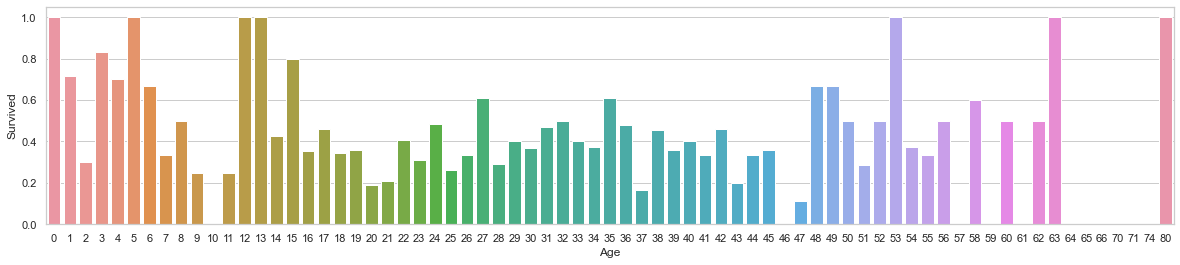

In [35]:
# .... continue with plot Age column

# peaks for survived/not survived passengers by their age
facet = sns.FacetGrid(titanic_df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, titanic_df['Age'].max()))
facet.add_legend()

# average survived passengers by age
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_age = titanic_df[["Age", "Survived"]].groupby(['Age'],as_index=False).mean()
sns.barplot(x='Age', y='Survived', data=average_age)

In [36]:
# Cabin
# It has a lot of NaN values, so it won't cause a remarkable impact on prediction
titanic_df.drop("Cabin",axis=1,inplace=True)
test_df.drop("Cabin",axis=1,inplace=True)

In [37]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q
0,0,3,male,22,1,0,7,0,0
1,1,1,female,38,1,0,71,1,0
2,1,3,female,26,0,0,7,0,0
3,1,1,female,35,1,0,53,0,0
4,0,3,male,35,0,0,8,0,0


In [38]:
titanic_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
C           0
Q           0
dtype: int64

In [39]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q
0,892,3,male,34,0,0,7,0,1
1,893,3,female,47,1,0,7,0,0
2,894,2,male,62,0,0,9,0,1
3,895,3,male,27,0,0,8,0,0
4,896,3,female,22,1,1,12,0,0


In [42]:
titanic_df.Sex[titanic_df.Sex == 'male'] = 1
titanic_df.Sex[titanic_df.Sex == 'female'] = 0

test_df.Sex[test_df.Sex == 'male'] = 1
test_df.Sex[test_df.Sex == 'female'] = 0



In [59]:
titanic_df['Sex']=titanic_df.Sex.astype(int)
test_df['Sex']=test_df.Sex.astype(int)

In [60]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q
0,0,3,1,22,1,0,7,0,0
1,1,1,0,38,1,0,71,1,0
2,1,3,0,26,0,0,7,0,0
3,1,1,0,35,1,0,53,0,0
4,0,3,1,35,0,0,8,0,0


In [61]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q
0,892,3,1,34,0,0,7,0,1
1,893,3,0,47,1,0,7,0,0
2,894,2,1,62,0,0,9,0,1
3,895,3,1,27,0,0,8,0,0
4,896,3,0,22,1,1,12,0,0


In [62]:
# train and test split
# define training and testing sets

X_train = titanic_df.drop("Survived",axis=1)
Y_train = titanic_df["Survived"]
X_test  = test_df.drop("PassengerId",axis=1).copy()

In [63]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Pclass  891 non-null    int64
 1   Sex     891 non-null    int32
 2   Age     891 non-null    int32
 3   SibSp   891 non-null    int64
 4   Parch   891 non-null    int64
 5   Fare    891 non-null    int32
 6   C       891 non-null    uint8
 7   Q       891 non-null    uint8
dtypes: int32(3), int64(3), uint8(2)
memory usage: 33.2 KB


In [64]:
### running first model
#### Logistic regression model
import statsmodels.api as sm
logml=sm.GLM(Y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
logml.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      882
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -392.73
Date:                Sun, 06 Sep 2020   Deviance:                       785.47
Time:                        18:47:57   Pearson chi2:                     904.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8424      0.536      9.040      0.000       3.792       5.892
Pclass        -1.1009      0.144     -7.662      0.000      -1.382      -0.819
Sex           -2.7291      0.200    -13.613      0.000      -3.122      -2.336
Age           -0.0391      0.008     -5.000      0.000      -0.054      -0.024
SibSp         -0.3253      0.109     -2.984      0.003      -0.539      -0.112
Parch         -0.0910      0.119     -0.768      0.442      -0.323       0.141
Fare           0.0020      0.002      0.831      0.406      -0.003       0.007
C              0.4061      0.237      1.716      0.086      -0.058       0.870
Q              0.3456      0.329      1.050      0.294      -0.300       0.991
==============================================================================
"""

In [66]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
rfe=RFE(log,7)
rfe=rfe.fit(X_train,Y_train)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True False  True  True]
[1 1 1 1 1 2 1 1]


In [67]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Pclass', True, 1),
 ('Sex', True, 1),
 ('Age', True, 1),
 ('SibSp', True, 1),
 ('Parch', True, 1),
 ('Fare', False, 2),
 ('C', True, 1),
 ('Q', True, 1)]

In [68]:
from sklearn import metrics
log=LogisticRegression()
log.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [70]:
Y_pred = log.predict(X_test)

log.score(X_train, Y_train)

0.8013468013468014

In [71]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [72]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits =5, shuffle = True, random_state = 4)

# instantiating a model with cost=1
model = LogisticRegression()

In [73]:
# computing the cross-validation scores 
# note that the argument cv takes the 'folds' object, and
# we have specified 'accuracy' as the metric

cv_results = cross_val_score(model,X_train, Y_train, cv = folds, scoring = 'accuracy') 

In [74]:
# print 5 accuracies obtained from the 5 folds
print(cv_results)
print("mean accuracy = {}".format(cv_results.mean()))

[0.82122905 0.82022472 0.80337079 0.7752809  0.7752809 ]
mean accuracy = 0.7990772707300231


In [81]:
### Hyperparameter tunning using Gridsearch cross validation
# A common use of cross-validaion is for tunning hyperparameter of model.The most common techniqe
# is what is called grid search cross-validation
# step=1 create the cross validation scheme
fold=KFold(n_splits=5,shuffle=True,random_state=100)
# step=2 specify the range of hyperparameter to tune
hyper_param=[{'n_features_to_select':list(range(1,9))}]
# step=3 perform the grid search
lmm=LogisticRegression()
lmm.fit(X_train,Y_train)
rfe=RFE(lmm)

# call gridsearch cv
model_cv=GridSearchCV(estimator=rfe,param_grid=hyper_param, scoring='accuracy',cv=fold,verbose=1,return_train_score=True)
# fit the model
model_cv.fit(X_train,Y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.7s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             error_score='raise-deprecating',
             estimator=RFE(estimator=LogisticRegression(C=1.0,
                                                        class_weight=None,
                                                        dual=False,
                                                        fit_intercept=True,
                                                        intercept_scaling=1,
                                                        l1_ratio=None,
                                                        max_iter=100,
                                                        multi_class='warn',
                                                        n_jobs=None,
                                                        penalty='l2',
                                                        random_state=None,
                                                        solver='warn',
                          

In [90]:
Y_pred = model_cv.predict(X_test)

log.score(X_train, Y_train)

0.8013468013468014

In [82]:
cv_result=pd.DataFrame(model_cv.cv_results_)
cv_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.028792,3.921210e-03,0.000800,0.001600,1,{'n_features_to_select': 1},0.787709,0.730337,0.820225,0.803371,...,0.786756,0.030345,5,0.786517,0.800842,0.778401,0.782609,0.785414,0.786756,0.007580
1,0.022394,3.199790e-03,0.000797,0.001594,2,{'n_features_to_select': 2},0.787709,0.730337,0.820225,0.803371,...,0.786756,0.030345,5,0.786517,0.800842,0.778401,0.782609,0.785414,0.786756,0.007580
2,0.015994,3.873843e-07,0.002400,0.001959,3,{'n_features_to_select': 3},0.787709,0.730337,0.814607,0.780899,...,0.780022,0.027433,8,0.786517,0.800842,0.768583,0.776999,0.775596,0.781707,0.011145
3,0.015995,2.529263e-03,0.002399,0.001959,4,{'n_features_to_select': 4},0.804469,0.730337,0.814607,0.780899,...,0.783389,0.029145,7,0.799157,0.820477,0.768583,0.775596,0.775596,0.787882,0.019307
4,0.014395,1.958613e-03,0.000800,0.001600,5,{'n_features_to_select': 5},0.804469,0.735955,0.820225,0.803371,...,0.794613,0.029909,3,0.799157,0.820477,0.781206,0.785414,0.784011,0.794053,0.014593
5,0.011997,2.019674e-06,0.000000,0.000000,6,{'n_features_to_select': 6},0.804469,0.724719,0.825843,0.814607,...,0.795735,0.036196,2,0.801966,0.816269,0.795231,0.789621,0.805049,0.801627,0.009069
6,0.011196,1.598216e-03,0.003199,0.001599,7,{'n_features_to_select': 7},0.804469,0.730337,0.825843,0.820225,...,0.796857,0.034366,1,0.804775,0.820477,0.795231,0.796634,0.805049,0.804433,0.008982
7,0.008796,1.598555e-03,0.000000,0.000000,8,{'n_features_to_select': 8},0.804469,0.730337,0.803371,0.820225,...,0.793490,0.032113,4,0.803371,0.820477,0.795231,0.799439,0.802244,0.804152,0.008632


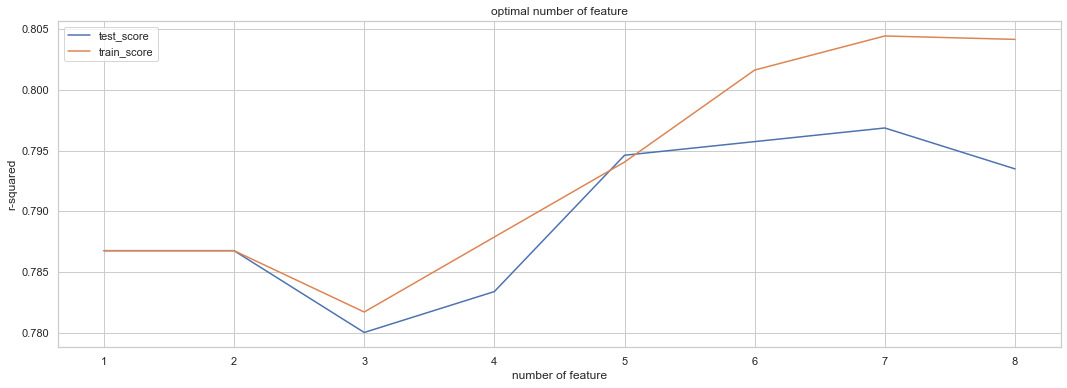

In [83]:
## ploting cv
plt.figure(figsize=(16,6))
plt.plot(cv_result['param_n_features_to_select'],cv_result['mean_test_score'])
plt.plot(cv_result['param_n_features_to_select'],cv_result['mean_train_score'])
plt.xlabel('number of feature')
plt.ylabel('r-squared')
plt.title('optimal number of feature')
plt.legend(['test_score','train_score'],loc='upper left')

In [92]:
#### build this model by SVM
#use svm linear model

In [93]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
model = SVC(C = 1)

# fit
model.fit(X_train, Y_train)

# predict
y_pred = model.predict(X_test)

In [95]:
model.score(X_train, Y_train)

0.877665544332211

In [102]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# instantiating a model with cost=1
model = SVC(C = 1)
cv_results = cross_val_score(model, X_train, Y_train, cv = folds, scoring = 'accuracy')
# print 5 accuracies obtained from the 5 folds
print(cv_results)
print("mean accuracy = {}".format(cv_results.mean()))

[0.74860335 0.69101124 0.69662921 0.70224719 0.71348315]
mean accuracy = 0.7103948276944323


In [103]:
# specify range of parameters (C) as a list
params = {"C": [0.1, 1, 10, 100, 1000]}

model = SVC()

# set up grid search scheme
# note that we are still using the 5 fold CV scheme we set up earlier
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                       return_train_score=True)     

In [104]:
# fit the model - it will fit 5 folds across all values of C
model_cv.fit(X_train, Y_train)  

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    1.9s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None, param_grid={'C': [0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=1)

In [105]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.035186,0.002996,0.006399,0.001958,0.1,{'C': 0.1},0.664804,0.646067,0.601124,0.556180,...,0.616162,0.037694,5,0.603933,0.608696,0.619916,0.631136,0.617111,0.616158,0.009429
1,0.036789,0.001600,0.005597,0.001959,1,{'C': 1},0.748603,0.691011,0.696629,0.702247,...,0.710438,0.020527,3,0.886236,0.879383,0.884993,0.889201,0.892006,0.886364,0.004255
2,0.048786,0.001601,0.006397,0.001959,10,{'C': 10},0.765363,0.724719,0.724719,0.741573,...,0.735129,0.016928,1,0.946629,0.948107,0.941094,0.950912,0.950912,0.947531,0.003618
3,0.069581,0.007837,0.007198,0.001600,100,{'C': 100},0.737430,0.719101,0.691011,0.668539,...,0.709315,0.025794,4,0.964888,0.964937,0.956522,0.970547,0.964937,0.964366,0.004487
4,0.083974,0.010115,0.005600,0.001958,1000,{'C': 1000},0.726257,0.724719,0.696629,0.679775,...,0.711560,0.019869,2,0.966292,0.967742,0.959327,0.973352,0.967742,0.966891,0.004489


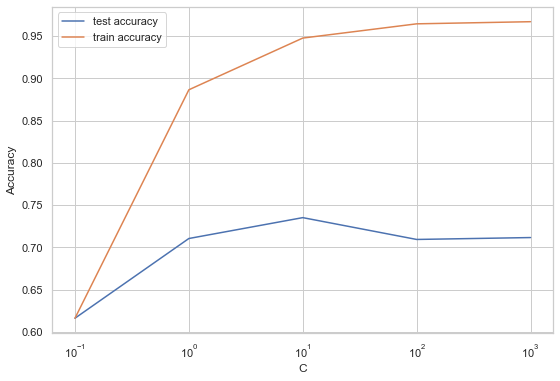

In [106]:
#To get a better sense of how training and test accuracy varies with C,
#let's plot the tranining and test accuracies against C.
# plot of C versus train and test scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [107]:
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test accuracy is {0} at C = {1}".format(best_score, best_C))

 The highest test accuracy is 0.7351290684624018 at C = 10


In [109]:
# Non-Linear SVM Let's now try a non-linear model with the RBF kernel.
# rbf kernel with other hyperparameters kept to default
from sklearn import svm
svm_rbf = svm.SVC(kernel='rbf')
svm_rbf.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [111]:
svm_rbf.score(X_train, Y_train)



0.877665544332211

In [112]:
from sklearn.model_selection import GridSearchCV

parameters = {'C':[1, 10, 100], 
             'gamma': [1e-2, 1e-3, 1e-4]}

# instantiate a model 
svc_grid_search = svm.SVC(kernel="rbf")

# create a classifier to perform grid search
clf = GridSearchCV(svc_grid_search, param_grid=parameters, scoring='accuracy',return_train_score=True)

# fit
clf.fit(X_train, Y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 10, 100], 'gamma': [0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=0)

In [113]:
# results
cv_results = pd.DataFrame(clf.cv_results_)
cv_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.028792,3.921210e-03,0.000800,0.001600,1,{'n_features_to_select': 1},0.787709,0.730337,0.820225,0.803371,...,0.786756,0.030345,5,0.786517,0.800842,0.778401,0.782609,0.785414,0.786756,0.007580
1,0.022394,3.199790e-03,0.000797,0.001594,2,{'n_features_to_select': 2},0.787709,0.730337,0.820225,0.803371,...,0.786756,0.030345,5,0.786517,0.800842,0.778401,0.782609,0.785414,0.786756,0.007580
2,0.015994,3.873843e-07,0.002400,0.001959,3,{'n_features_to_select': 3},0.787709,0.730337,0.814607,0.780899,...,0.780022,0.027433,8,0.786517,0.800842,0.768583,0.776999,0.775596,0.781707,0.011145
3,0.015995,2.529263e-03,0.002399,0.001959,4,{'n_features_to_select': 4},0.804469,0.730337,0.814607,0.780899,...,0.783389,0.029145,7,0.799157,0.820477,0.768583,0.775596,0.775596,0.787882,0.019307
4,0.014395,1.958613e-03,0.000800,0.001600,5,{'n_features_to_select': 5},0.804469,0.735955,0.820225,0.803371,...,0.794613,0.029909,3,0.799157,0.820477,0.781206,0.785414,0.784011,0.794053,0.014593
5,0.011997,2.019674e-06,0.000000,0.000000,6,{'n_features_to_select': 6},0.804469,0.724719,0.825843,0.814607,...,0.795735,0.036196,2,0.801966,0.816269,0.795231,0.789621,0.805049,0.801627,0.009069
6,0.011196,1.598216e-03,0.003199,0.001599,7,{'n_features_to_select': 7},0.804469,0.730337,0.825843,0.820225,...,0.796857,0.034366,1,0.804775,0.820477,0.795231,0.796634,0.805049,0.804433,0.008982
7,0.008796,1.598555e-03,0.000000,0.000000,8,{'n_features_to_select': 8},0.804469,0.730337,0.803371,0.820225,...,0.793490,0.032113,4,0.803371,0.820477,0.795231,0.799439,0.802244,0.804152,0.008632


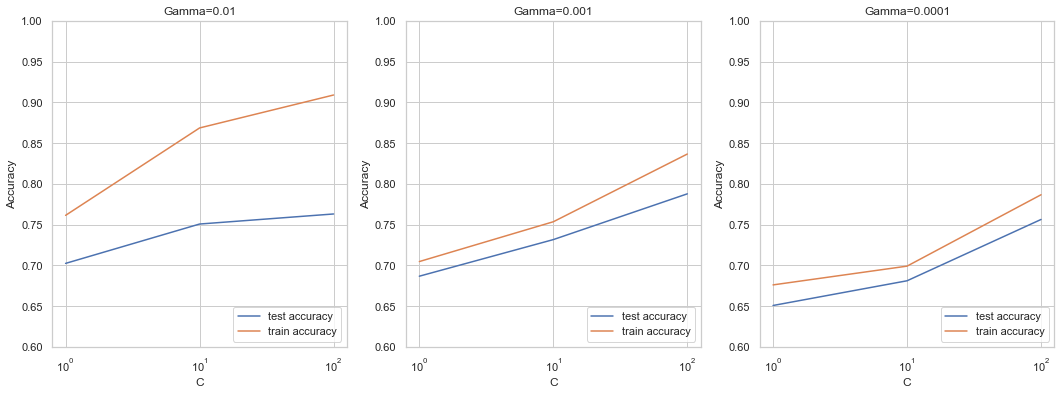

In [114]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"],gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"],gamma_01['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')

plt.show()

In [115]:
# optimal hyperparameters
best_C = 10
best_gamma = 0.001

# model
svm_final = svm.SVC(kernel='rbf', C=best_C, gamma=best_gamma)

# fit
svm_final.fit(X_train, Y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [117]:
# predict
predictions = svm_final.predict(X_test)
svm_rbf.score(X_train, Y_train)


0.877665544332211

In [118]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import gc # for deleting unused variables
%matplotlib inline

import os
import warnings
warnings.filterwarnings('ignore')

In [119]:
# adaboost classifier with max 600 decision trees of depth=2
# learning_rate/shrinkage=1.5

# base estimator
tree = DecisionTreeClassifier(max_depth=2)

# adaboost with the tree as base estimator
adaboost_model_1 = AdaBoostClassifier(
    base_estimator=tree,
    n_estimators=600,
    learning_rate=1.5,
    algorithm="SAMME")

In [120]:
# fit
adaboost_model_1.fit(X_train, Y_train)
# predictions
# the second column represents the probability of a click resulting in a download
predictions = adaboost_model_1.predict_proba(X_test)
predictions[:10]

array([[0.50354384, 0.49645616],
       [0.50139849, 0.49860151],
       [0.50208791, 0.49791209],
       [0.50184365, 0.49815635],
       [0.49510896, 0.50489104],
       [0.50247914, 0.49752086],
       [0.49408794, 0.50591206],
       [0.50904776, 0.49095224],
       [0.4942887 , 0.5057113 ],
       [0.5061609 , 0.4938391 ]])

In [123]:
# predict
predictions = adaboost_model_1.predict_proba(X_test)
adaboost_model_1.score(X_train, Y_train)



0.8933782267115601

In [124]:
# parameter grid
param_grid = {"base_estimator__max_depth" : [2, 5],
              "n_estimators": [200, 400, 600]
             }

In [125]:
# base estimator
tree = DecisionTreeClassifier()

# adaboost with the tree as base estimator
# learning rate is arbitrarily set to 0.6, we'll discuss learning_rate below
ABC = AdaBoostClassifier(
    base_estimator=tree,
    learning_rate=0.6,
    algorithm="SAMME")

In [128]:
# run grid search
folds = 3
grid_search_ABC = GridSearchCV(ABC, 
                               cv = folds,
                               param_grid=param_grid, 
                               scoring = 'accuracy', 
                               return_train_score=True,                         
                               verbose = 1)


In [129]:
# fit 
grid_search_ABC.fit(X_train, Y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   16.0s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME',
                                          base_estimator=DecisionTreeClassifier(class_weight=None,
                                                                                criterion='gini',
                                                                                max_depth=None,
                                                                                max_features=None,
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_impurity_split=None,
                                                                                min_samples_leaf=1,
                                                                                mi

In [130]:
cv_results = pd.DataFrame(grid_search_ABC.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_base_estimator__max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.353230,0.019131,0.031991,5.947204e-07,2,200,"{'base_estimator__max_depth': 2, 'n_estimators...",0.767677,0.814815,0.814815,0.799102,0.022221,1,0.855219,0.833333,0.848485,0.845679,0.009152
1,0.670468,0.010493,0.063982,2.480266e-06,2,400,"{'base_estimator__max_depth': 2, 'n_estimators...",0.764310,0.808081,0.811448,0.794613,0.021472,3,0.850168,0.836700,0.860269,0.849046,0.009655
2,1.045027,0.044569,0.097305,7.541813e-03,2,600,"{'base_estimator__max_depth': 2, 'n_estimators...",0.754209,0.808081,0.814815,0.792368,0.027122,5,0.851852,0.840067,0.867003,0.852974,0.011025
3,0.410545,0.007540,0.031990,1.266589e-06,5,200,"{'base_estimator__max_depth': 5, 'n_estimators...",0.774411,0.818182,0.804714,0.799102,0.018305,1,0.968013,0.949495,0.942761,0.953423,0.010677
4,0.822424,0.010496,0.065313,1.885369e-03,5,400,"{'base_estimator__max_depth': 5, 'n_estimators...",0.771044,0.808081,0.801347,0.793490,0.016109,4,0.976431,0.962963,0.959596,0.966330,0.007274
5,1.225405,0.010291,0.095971,2.063235e-06,5,600,"{'base_estimator__max_depth': 5, 'n_estimators...",0.781145,0.804714,0.791246,0.792368,0.009655,5,0.976431,0.966330,0.964646,0.969136,0.005204


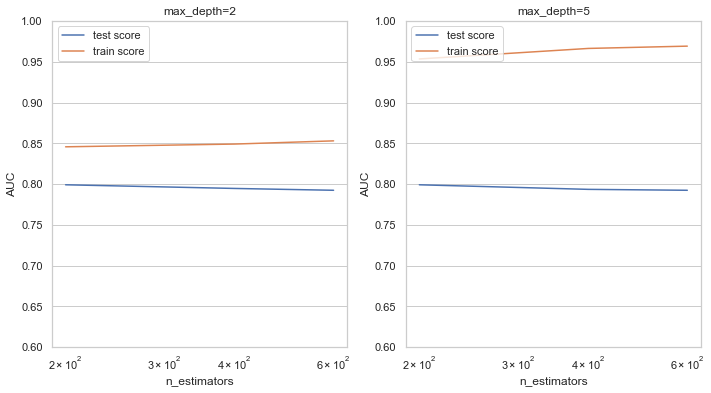

In [131]:

plt.figure(figsize=(16,6))
for n, depth in enumerate(param_grid['base_estimator__max_depth']):
    

    # subplot 1/n
    plt.subplot(1,3, n+1)
    depth_df = cv_results[cv_results['param_base_estimator__max_depth']==depth]

    plt.plot(depth_df["param_n_estimators"], depth_df["mean_test_score"])
    plt.plot(depth_df["param_n_estimators"], depth_df["mean_train_score"])
    plt.xlabel('n_estimators')
    plt.ylabel('AUC')
    plt.title("max_depth={0}".format(depth))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')


In [133]:
# model performance on test data with chosen hyperparameters

# base estimator
tree = DecisionTreeClassifier(max_depth=2)

# adaboost with the tree as base estimator
# learning rate is arbitrarily set, we'll discuss learning_rate below
ABC = AdaBoostClassifier(
    base_estimator=tree,
    learning_rate=0.6,
    n_estimators=200,
    algorithm="SAMME")

ABC.fit(X_train, Y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                               

In [135]:
# predict on test data
predictions = ABC.predict_proba(X_test)
predictions[:10]

array([[0.5302706 , 0.4697294 ],
       [0.49037439, 0.50962561],
       [0.53273119, 0.46726881],
       [0.53130781, 0.46869219],
       [0.48693722, 0.51306278],
       [0.52814618, 0.47185382],
       [0.4870168 , 0.5129832 ],
       [0.53122848, 0.46877152],
       [0.48503245, 0.51496755],
       [0.53122848, 0.46877152]])

In [137]:
# predict
predictions = ABC.predict_proba(X_test)
ABC.score(X_train, Y_train)


0.8282828282828283

In [138]:
####Gradient Boosting Classifier Let's now try the gradient boosting classifier. We'll experiment with two main hyperparameters 
#now - learning_rate (shrinkage) and subsample.

In [139]:
# parameter grid
param_grid = {"learning_rate": [0.2, 0.6, 0.9],
              "subsample": [0.3, 0.6, 0.9]
             }

In [142]:
# adaboost with the tree as base estimator
GBC = GradientBoostingClassifier(max_depth=2, n_estimators=200)

In [143]:
# run grid search
folds = 3
grid_search_GBC = GridSearchCV(GBC, 
                               cv = folds,
                               param_grid=param_grid, 
                               scoring = 'roc_auc', 
                               return_train_score=True,                         
                               verbose = 1)

grid_search_GBC.fit(X_train, Y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    6.5s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=2,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=200,
                                                  n_iter_no_change=None,
                                                  presort=

In [144]:
cv_results = pd.DataFrame(grid_search_GBC.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.274496,0.074452,0.023051,2.694544e-02,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.820080,0.863843,0.879470,0.854464,0.025137,2,0.958855,0.949034,0.934372,0.947420,0.010060
1,0.228192,0.009388,0.004997,8.158534e-04,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.823051,0.869356,0.849176,0.847194,0.018955,3,0.967728,0.961197,0.948549,0.959158,0.007962
2,0.201875,0.006372,0.003998,4.899036e-07,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.819408,0.882106,0.874796,0.858770,0.027993,1,0.970940,0.962126,0.949244,0.960770,0.008909
3,0.216533,0.009458,0.003998,8.778064e-07,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.642196,0.781181,0.657176,0.693518,0.062288,8,0.731791,0.871944,0.750276,0.784670,0.062172
4,0.248848,0.014712,0.004663,9.405492e-04,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.738879,0.847330,0.833933,0.806714,0.048277,6,0.914096,0.982420,0.976063,0.957526,0.030819


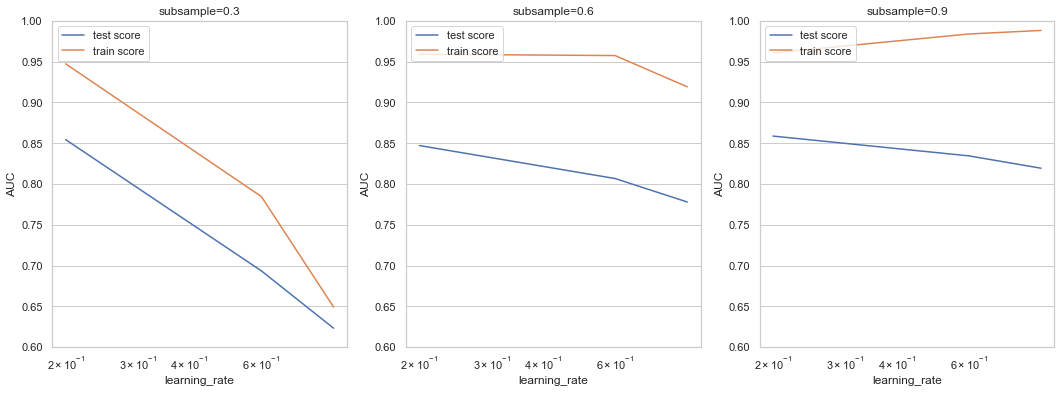

In [145]:
# # plotting
plt.figure(figsize=(16,6))


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [146]:
#XGBoost Let's finally try XGBoost. The hyperparameters are the same, some important ones 
#being subsample, learning_rate, max_depth 

In [147]:
# fit model on training data with default hyperparameters
model = XGBClassifier()
model.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [148]:
# make predictions for test data
# use predict_proba since we need probabilities to compute auc
y_pred = model.predict_proba(X_test)
y_pred[:10]

array([[0.9921236 , 0.00787639],
       [0.935975  , 0.06402498],
       [0.84639263, 0.15360737],
       [0.36381269, 0.6361873 ],
       [0.51631117, 0.48368886],
       [0.95232934, 0.04767065],
       [0.72173893, 0.27826104],
       [0.9822734 , 0.01772657],
       [0.04204696, 0.95795304],
       [0.996079  , 0.00392094]], dtype=float32)

In [149]:
# predict
predictions = model.predict_proba(X_test)
model.score(X_train, Y_train)


0.9483726150392817

In [241]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 5

# specify range of hyperparameters
param_grid = {'learning_rate': [0.001,0.1,0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9,0.11]}          


# specify model
xgb_model = XGBClassifier(max_depth=3, n_estimators=150)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      



In [242]:
# fit the model
model_cv.fit(X_train, Y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    8.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=3, min_child_weight=None,
                                     missing=nan, monotone_constraints...
                                     objective='binary:logistic',
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                   

In [243]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.096539,0.007757,0.007395,0.000800,0.001,0.3,"{'learning_rate': 0.001, 'subsample': 0.3}",0.842490,0.839987,0.858556,...,0.858533,0.017398,11,0.881532,0.883393,0.873015,0.875214,0.867485,0.876128,0.005783
1,0.098140,0.008466,0.007195,0.000400,0.001,0.6,"{'learning_rate': 0.001, 'subsample': 0.6}",0.837220,0.832938,0.867981,...,0.860778,0.023584,10,0.878946,0.887369,0.877089,0.876914,0.873042,0.878672,0.004754
2,0.096341,0.007140,0.007196,0.000400,0.001,0.9,"{'learning_rate': 0.001, 'subsample': 0.9}",0.843874,0.835244,0.875000,...,0.861834,0.024316,9,0.874857,0.884403,0.870770,0.873057,0.867186,0.874055,0.005774
3,0.087946,0.005724,0.007796,0.000400,0.001,0.11,"{'learning_rate': 0.001, 'subsample': 0.11}",0.829842,0.842029,0.850201,...,0.850701,0.014302,14,0.869104,0.864748,0.861809,0.864336,0.858257,0.863651,0.003575
4,0.086547,0.006617,0.008195,0.000400,0.1,0.3,"{'learning_rate': 0.1, 'subsample': 0.3}",0.868511,0.810277,0.880414,...,0.865578,0.032054,5,0.931546,0.942986,0.929767,0.930412,0.921836,0.931309,0.006772
5,0.097340,0.008749,0.007196,0.000400,0.1,0.6,"{'learning_rate': 0.1, 'subsample': 0.6}",0.861001,0.811067,0.887767,...,0.866716,0.034321,4,0.939715,0.952610,0.939000,0.941065,0.936318,0.941742,0.005650
6,0.125922,0.058459,0.008395,0.002331,0.1,0.9,"{'learning_rate': 0.1, 'subsample': 0.9}",0.863505,0.807181,0.890909,...,0.867520,0.036019,1,0.941246,0.951346,0.942046,0.942753,0.937857,0.943050,0.004475
7,0.079551,0.004221,0.007795,0.000400,0.1,0.11,"{'learning_rate': 0.1, 'subsample': 0.11}",0.856785,0.822661,0.870922,...,0.867056,0.027077,2,0.902513,0.914015,0.906901,0.903247,0.897176,0.904771,0.005570
8,0.093343,0.007705,0.007794,0.000979,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.861528,0.814361,0.879345,...,0.863102,0.026822,8,0.942151,0.955568,0.943859,0.945152,0.941175,0.945581,0.005178
9,0.090345,0.000490,0.007595,0.000490,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.862978,0.809750,0.891377,...,0.864545,0.033064,6,0.958193,0.969595,0.957032,0.959758,0.955197,0.959955,0.005045


In [244]:
# convert parameters to int for plotting on x-axis
cv_results['param_learning_rate'] = cv_results['param_learning_rate'].astype('float')
#cv_results['param_max_depth'] = cv_results['param_max_depth'].astype('float')
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.096539,0.007757,0.007395,0.0008,0.001,0.3,"{'learning_rate': 0.001, 'subsample': 0.3}",0.842490,0.839987,0.858556,...,0.858533,0.017398,11,0.881532,0.883393,0.873015,0.875214,0.867485,0.876128,0.005783
1,0.098140,0.008466,0.007195,0.0004,0.001,0.6,"{'learning_rate': 0.001, 'subsample': 0.6}",0.837220,0.832938,0.867981,...,0.860778,0.023584,10,0.878946,0.887369,0.877089,0.876914,0.873042,0.878672,0.004754
2,0.096341,0.007140,0.007196,0.0004,0.001,0.9,"{'learning_rate': 0.001, 'subsample': 0.9}",0.843874,0.835244,0.875000,...,0.861834,0.024316,9,0.874857,0.884403,0.870770,0.873057,0.867186,0.874055,0.005774
3,0.087946,0.005724,0.007796,0.0004,0.001,0.11,"{'learning_rate': 0.001, 'subsample': 0.11}",0.829842,0.842029,0.850201,...,0.850701,0.014302,14,0.869104,0.864748,0.861809,0.864336,0.858257,0.863651,0.003575
4,0.086547,0.006617,0.008195,0.0004,0.100,0.3,"{'learning_rate': 0.1, 'subsample': 0.3}",0.868511,0.810277,0.880414,...,0.865578,0.032054,5,0.931546,0.942986,0.929767,0.930412,0.921836,0.931309,0.006772


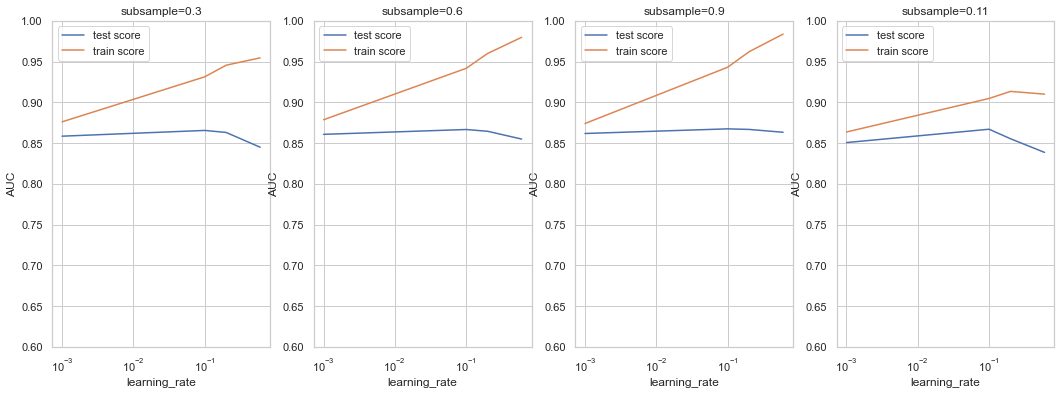

In [245]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.001,0.1,0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9, 0.11]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [260]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
params = {'learning_rate': 0.001,
          'max_depth': 5, 
          'n_estimators':250,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
model1 = XGBClassifier(params = params)
model1.fit(X_train, Y_train)

[22:37:12] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { params } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic',
              params={'learning_rate': 0.001, 'max_depth': 5,
                      'n_estimators': 250, 'objective': 'binary:logistic',
                      'subsample': 0.9},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [261]:
# predict
y_pred = model1.predict_proba(X_test)
y_pred[:10]

array([[0.9921236 , 0.00787639],
       [0.935975  , 0.06402498],
       [0.84639263, 0.15360737],
       [0.36381269, 0.6361873 ],
       [0.51631117, 0.48368886],
       [0.95232934, 0.04767065],
       [0.72173893, 0.27826104],
       [0.9822734 , 0.01772657],
       [0.04204696, 0.95795304],
       [0.996079  , 0.00392094]], dtype=float32)

In [262]:
#Y_pred = random_forest.predict(X_test)
# predict
predictions = model1.predict(X_test)
model1.score(X_train, Y_train)


0.9483726150392817

In [210]:
# get Correlation Coefficient for each feature using Logistic Regression
coeff_df = pd.DataFrame(titanic_df.columns.delete(0))
coeff_df.columns = ['Features']
coeff_df["Coefficient Estimate"] = pd.Series(log.coef_[0])

# preview
coeff_df

,Features,Coefficient Estimate
0,Pclass,-0.950310
1,Sex,-2.481223
2,Age,-0.028058
3,SibSp,-0.257857
4,Parch,-0.029072
5,Fare,0.505842
6,C,0.321844
7,Q,NaN


In [215]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": predictions
    })
submission.to_csv('titanic.csv', index=False)

In [184]:
# Random Forests

random_forest = RandomForestClassifier(n_estimators=100)

random_forest.fit(X_train, Y_train)

Y_pred = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

0.9618406285072951

In [189]:
# predict
predictions1 = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
print(predictions1)

[0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 0 0 0 1 0 1 1 0
 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 1 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 1 1 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1
 0 1 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0
 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 0 0 0 1 1
 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 0 1 1 0 1 1]


In [190]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": predictions1
    })
submission.to_csv('titanic_1.csv', index=False)

In [191]:
# again bulid model by left the variable 
### running first model
#### Logistic regression model
import statsmodels.api as sm
logml=sm.GLM(Y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
logml.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      882
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -392.73
Date:                Sun, 06 Sep 2020   Deviance:                       785.47
Time:                        22:08:17   Pearson chi2:                     904.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8424      0.536      9.040      0.000       3.792       5.892
Pclass        -1.1009      0.144     -7.662      0.000      -1.382      -0.819
Sex           -2.7291      0.200    -13.613      0.000      -3.122      -2.336
Age           -0.0391      0.008     -5.000      0.000      -0.054      -0.024
SibSp         -0.3253      0.109     -2.984      0.003      -0.539      -0.112
Parch         -0.0910      0.119     -0.768      0.442      -0.323       0.141
Fare           0.0020      0.002      0.831      0.406      -0.003       0.007
C              0.4061      0.237      1.716      0.086      -0.058       0.870
Q              0.3456      0.329      1.050      0.294      -0.300       0.991
==============================================================================
"""

In [192]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
rfe=RFE(log,7)
rfe=rfe.fit(X_train,Y_train)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True False  True  True]
[1 1 1 1 1 2 1 1]


In [193]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Pclass', True, 1),
 ('Sex', True, 1),
 ('Age', True, 1),
 ('SibSp', True, 1),
 ('Parch', True, 1),
 ('Fare', False, 2),
 ('C', True, 1),
 ('Q', True, 1)]

In [194]:
# first i drop fare 
# train and test split
# define training and testing sets

X_train_ = titanic_df.drop(["Survived",'Fare'],axis=1)
Y_train_ = titanic_df["Survived"]
X_test_  = test_df.drop(["PassengerId",'Fare'],axis=1).copy()

In [195]:
from sklearn import metrics
log=LogisticRegression()
log.fit(X_train_, Y_train_)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [197]:
Y_pred = log.predict(X_test_)

log.score(X_train_, Y_train_)

0.8013468013468014

In [198]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
model1 = XGBClassifier(params = params)
model1.fit(X_train_, Y_train_)

[22:15:15] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { params } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic',
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [199]:
y_pred_ = model1.predict_proba(X_test_)
y_pred_[:10]

array([[0.99028045, 0.00971952],
       [0.96598816, 0.03401186],
       [0.8604346 , 0.1395654 ],
       [0.39228177, 0.6077182 ],
       [0.38671046, 0.61328954],
       [0.90817463, 0.09182534],
       [0.59355855, 0.40644142],
       [0.98331296, 0.01668704],
       [0.72978616, 0.2702138 ],
       [0.9505194 , 0.04948062]], dtype=float32)

In [201]:
# predict
predictions = model1.predict(X_test_)
model1.score(X_train_, Y_train_)


0.9135802469135802